In [1]:
import itertools
import matplotlib.pyplot as plt
from math import sqrt, log
import numpy as np
import random
from datetime import datetime
random.seed(datetime.now())
import pandas as pd
import os
savedir = "D:\\Uni\\SEMESTERS\\MS\\BDA\\I\\ComplexSystems\\Majority-vote-model\\figs\\"
%matplotlib inline

In [2]:
el = ['-1','1']
ls = []
for i in el:
    for j in el:
        for k in el:
            for x in el:
                for y in el:
                    for z in el:
                        #file.write(i+","+j+","+k+","+x+","+y+","+z + "\n")
                        
#file.close()

SyntaxError: unexpected EOF while parsing (<ipython-input-2-2b350881e874>, line 11)

In [150]:
a=0

for i in range (6):
    for j in range(i+1,6):
        for k in range(j+1,6):
            a+=1
            print(i+1,j+1,k, "    ", a)

for elem in set(list(itertools.combinations([1,2,3,4,5,6],3))):
    a+=1
    print(elem,i)
    
    
    
    

1 2 2      1
1 2 3      2
1 2 4      3
1 2 5      4
1 3 3      5
1 3 4      6
1 3 5      7
1 4 4      8
1 4 5      9
1 5 5      10
2 3 3      11
2 3 4      12
2 3 5      13
2 4 4      14
2 4 5      15
2 5 5      16
3 4 4      17
3 4 5      18
3 5 5      19
4 5 5      20
(3, 5, 6) 5
(1, 2, 5) 5
(4, 5, 6) 5
(1, 3, 6) 5
(1, 4, 5) 5
(2, 4, 5) 5
(2, 3, 6) 5
(1, 5, 6) 5
(1, 2, 4) 5
(2, 5, 6) 5
(3, 4, 6) 5
(1, 3, 5) 5
(2, 3, 5) 5
(1, 2, 6) 5
(1, 2, 3) 5
(1, 4, 6) 5
(1, 3, 4) 5
(3, 4, 5) 5
(2, 3, 4) 5
(2, 4, 6) 5


In [6]:
def borders(pstart, pend , pnum, which):
    # which -> 1 for +, 0 for - 
    #print("--------------------borders plotter---------------------------")
    error = 1.0e-9
    p = pstart
    #print("pstart:",pstart)
    pmax = pend
    #print("pend:",pmax)
    pstep = (pmax - p)/pnum
    if pnum <= 1: pstep = 1 
    #print("pnum:",pnum)
    border_up = 0
    border_down = 0
    while p <= pmax:
        border_down = (17-105*p)/(210*(1-p))
        if border_down < 0:
            border_down = 0
        if which:
            # for + 
            border_up = 0.5
        else:
            # for -
            border_up = (1-5*p)/(10*(1-p))
            if border_up < 0:
                border_up = 0
        
        #print(p, " --------- > border_down: ", border_down, "--------- > border_up: ", border_up)
        p+=pstep
    #print("-----------------------------------------------")
    return (border_down, border_up)
borders(0.0,0.99,5, False)
def borders_for_p(qstart, qend , qnum, which):
    # which -> 1 for +, 0 for - 
    #print("--------------------borders plotter---------------------------")
    error = 1.0e-9
    q = qstart
    #print("pstart:",pstart)
    qmax = qend
    #print("pend:",pmax)
    qstep = (qmax - q)/qnum
    if qnum <= 1: qstep = 1 
    #print("pnum:",pnum)
    border_up = 0
    border_down = 0
    while q <= qmax:
        g = 1-2*q
        border_down = (5*g-6)/(5*g)
        if border_down < 0 :
            border_down = 0 + error
        if  border_down > 1:
            border_down = 1 - error
        if which:
            # for + 
            border_up = (15*g-8)/(15*g)
        else:
            # for -
            border_up = 1#1.35*(10*q+1)/(5*(1-2*q))
        if border_up < 0:
            border_up = 0
        
        #print(p, " --------- > border_down: ", border_down, "--------- > border_up: ", border_up)
        q+=qstep
    #print("-----------------------------------------------")
    return (border_down, border_up)

borders_for_p(0.013,0.014,5,False)

(1e-09, 1)

border_plus: (0, 0.3333333333333333)
border_plus: (0, 0.16666666666666663)
border_plus: (0, -0.11111111111111122)


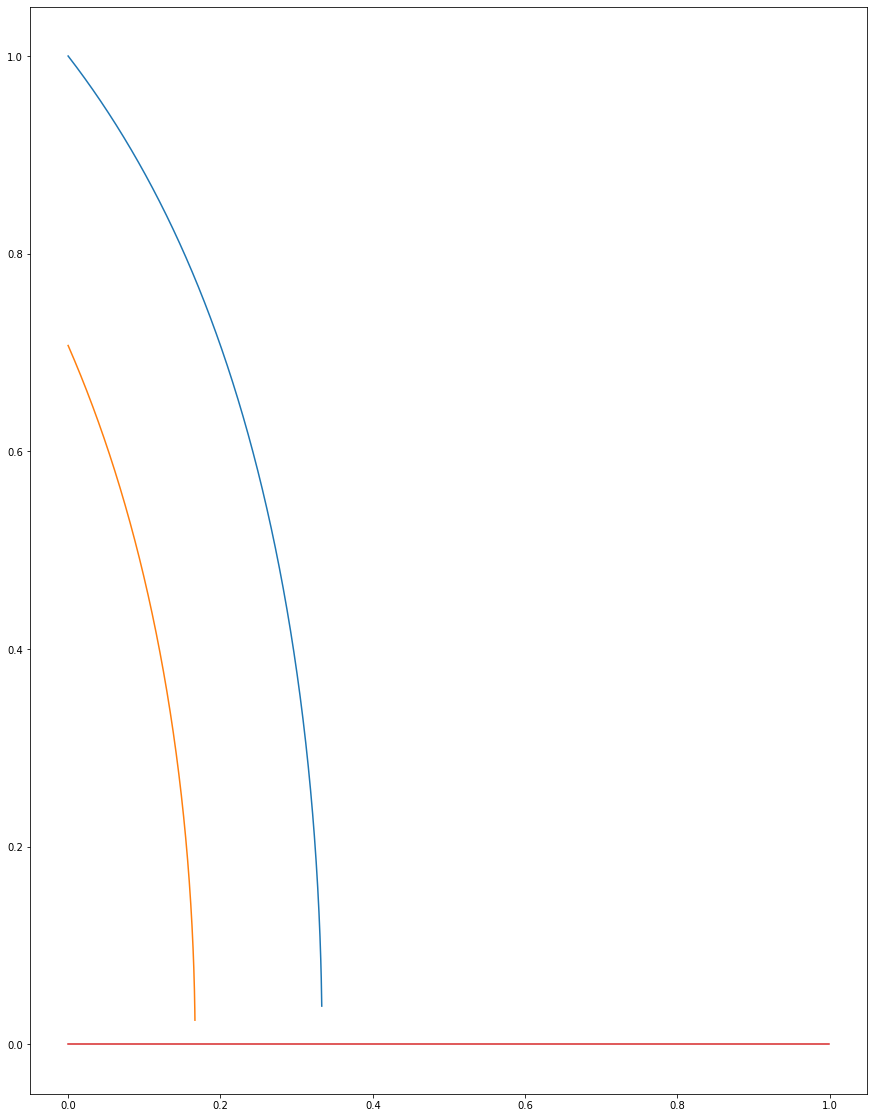

In [5]:




def makeSquareMagnet(pnum, qs,ax):

    #fig, ax = plt.subplots(figsize = (15,20) )
    error = 1.0e-19

    labels = []

    #q = qstart + error
    #qmax = qend - error
    #qstep = (qmax - q)/qnum
    for q in qs:
        all_m_minus = []
        all_m_plus = []
        #print(p)
        border_plus = (0,(6*q-1)/(6*q-3))
        print("border_plus:", border_plus)
        p_plus = border_plus[0]
        p_plus_max = border_plus[1] - error
        pstep_plus = (p_plus_max - p_plus)/pnum
        labels.append(q)
        #labels.append(q)
        ps_plus = []
        # make_plus
        g = 1-2*q
        while p_plus <= p_plus_max:
            p = p_plus
            mq = sqrt((2*p/(1-p)+6*q-1)/(2*q-1))
            ps_plus.append(p)
            all_m_plus.append(mq)
            #print(ps)
            #print(ms)
            p_plus += pstep_plus
        
        all_m = (all_m_plus)
        ps = (ps_plus) 
        ax.plot(ps,all_m)

        
    
    p = 0
    pmax =1
    pstep = 1/pnum
    ps = [i*pstep for i in range(pnum)]
    zeros = [i*0 for i in range(pnum)]
    ax.plot(ps,zeros)

qs = [0.0,0.1,0.2]
fig,axel = plt.subplots(figsize = (15,20) )
makeSquareMagnet(1000,qs,axel)



border_plus: (1e-09, 0.21568627450980388)
border_minus: (1e-09, 1)


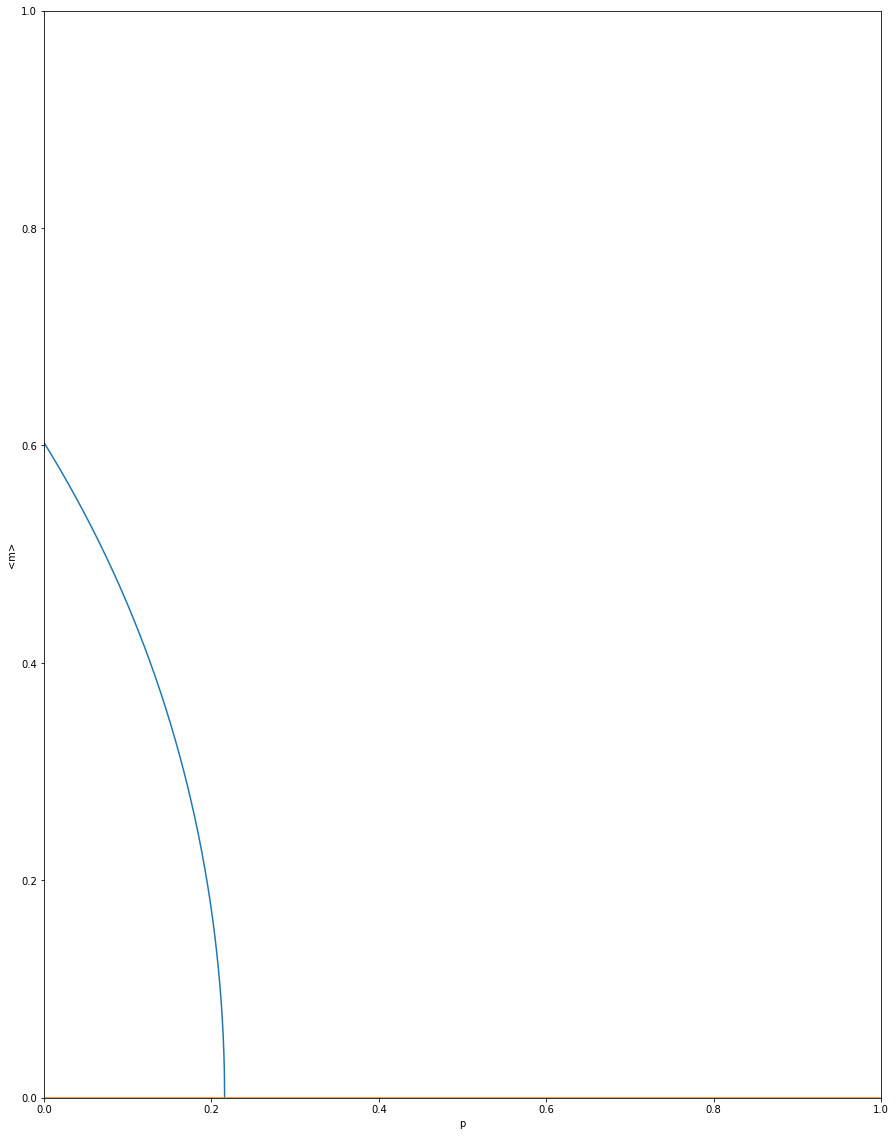

In [8]:
def makeTriangularMagnet_forp(pnum, qs,ax):

    #fig, ax = plt.subplots(figsize = (15,20) )
    error = 1.0e-19

    labels = []

    #q = qstart + error
    #qmax = qend - error
    #qstep = (qmax - q)/qnum
    for q in qs:
        all_m_minus = []
        all_m_plus = []
        #print(p)
        border_plus = borders_for_p(q,q,1,True)
        border_minus = borders_for_p(q,q,1,False)
        print("border_plus:", border_plus)
        print("border_minus:", border_minus)
        p_plus = border_plus[0]
        p_minus = border_minus[0] + error
        p_plus_max = border_plus[1]
        p_minus_max = border_minus[1] - error
        pstep_plus = (p_plus_max - p_plus)/pnum
        pstep_minus = (p_minus_max - p_minus)/pnum
        labels.append(q)
        #labels.append(q)
        ps_plus = []
        ps_minus = []
        # make_plus
        g = 1-2*q
        while p_plus <= p_plus_max:
            p = p_plus
            mq = sqrt((5*g*p+(2*sqrt(-1.0*g*(p-1)*((5*g*p)-(5*g)+6))-(5*g)))/(g*(p-1)))/sqrt(3)
            ps_plus.append(p)
            all_m_plus.append(mq)
            #print(ps)
            #print(ms)
            p_plus += pstep_plus
        # make minus
        while p_minus <= p_minus_max:
            p = p_minus
            mq = (-(5*g*p-(2*sqrt(-1.0*g*(p-1)*((5*g*p)-(5*g)+6))-(5*g)))/(g*(p-1)))/sqrt(3)
            ps_minus.append(p_minus)
            all_m_minus.append(mq)
            #print(ps)
            #print(ms)
            p_minus += pstep_minus
        
        all_m = (all_m_plus)
        ps = (ps_plus) 
        ax.plot(ps,all_m)

        
        #print(all_m_minus)
    p = 0
    pmax =1
    pstep = 1/pnum
    ps = [i*pstep for i in range(pnum)]
    zeros = [i*0 for i in range(pnum)]
    ax.plot(ps,zeros)
    
    
    #ax.set_title("M WTF")
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel("p")
    ax.set_ylabel("<m>")
    #ax.legend(["q=" + str(a) for a in labels],loc='best', frameon=False)

    #plt.savefig("./weird.png")
    #plt.show()
fig,axel = plt.subplots(figsize = (15,20) )
qs = [0.16]#,0.045,0.23, 0.25]
makeTriangularMagnet_forp(1000,qs,axel)

-------------- starting simulation for q = 0.1--------------
-------------- finished simulation for q = 0.1--------------


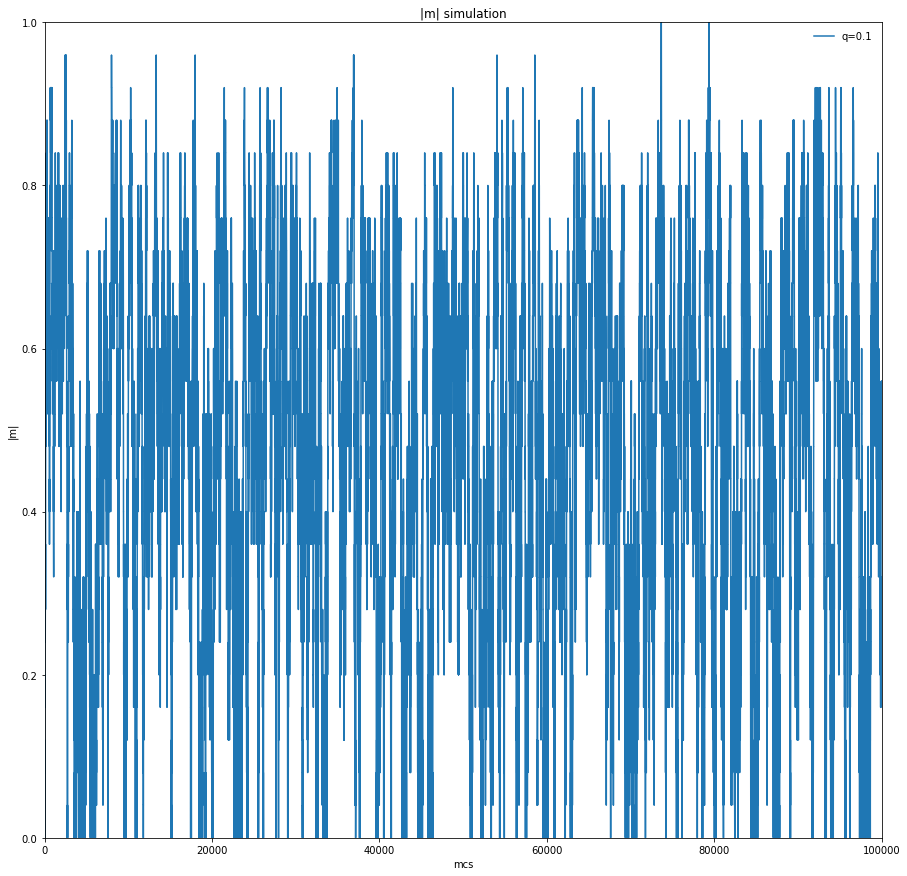

In [207]:
def proba(nei_sum, p, q,spin):
    gamma = 1-2*q
    f = 1
    if nei_sum == 0:
        f = 0
    elif nei_sum < 0:
        f = -1
    else:
        f = 1

    return 0.5*(1-p)*(1-gamma*spin*f)+p/2

def simulationAverages(N, num_nei, mcs, p, qs,savename = "simulation.png"):
    # FULLY CONNECTED
    # N - lattice sites
    # num_nei - neighbors number
    # mcs - Monte Carlo steps
    # av_num - number of averages
    # pstart - starting probability p
    # pmax - ending p
    # pnum - number of ps


    
    fig, ax = plt.subplots(figsize = (15,15))
    labels = []
    
    for q in qs:
        mcs_l = []
        abs_ms= []
        print("-------------- starting simulation for q = " + str(q) + "--------------")
        #av_abs_m = 0
        nums = np.random.choice([-1, 1], size=N, p=[.5, .5])
        m = (np.sum(nums))
        for i in range(mcs):
            spin_num = random.randint(0,N-1) # choose the spin to propose a flip
            spin = nums[spin_num]
            nei_sum = 0
            for j in range(num_nei):
                nei_choice = spin_num
                #print("spin_num = " + str(spin_num))
                while nei_choice == spin_num:
                    nei_choice = random.randint(0,N-1) # choose the spin for nei
                    #print(nei_choice)
                nei_sum += nums[nei_choice]
            #print(nei_sum)
            prob = proba(nei_sum,p,q,spin)
            if random.uniform(0, 1) <= prob:
                nums[spin_num] = -spin
                m -= 2*spin

            mcs_l.append(i)
            abs_ms.append(abs(m/N))
        #------------------------------------------------------------------------------------            
        print("-------------- finished simulation for q = " + str(q) + "--------------")
        #print(ps)
        #print(mcs_l)
        ax.plot(np.array(mcs_l),np.array(abs_ms))
        labels.append(q)
        
        
    ax.set_title("|m| simulation")
    ax.set_xlim(0,mcs)
    ax.set_ylim(0,1)
    ax.set_xlabel("mcs")
    ax.set_ylabel("|m|")
    ax.legend(["q=" + str(a) for a in labels],loc='best', frameon=False)
    
    plt.savefig(savename)
    plt.show()


qs = [0.1]#,0.05]#, 0.1, 0.12,0.2,0.4]
simulationAverages(50,4,100000,0.08, qs,savename = "simulation.png")
            
    
    

also making mean field
border_plus: (0, 0.3333333333333333)
border_plus: (0, 0.3055555555555556)
border_plus: (0, 0.25925925925925924)
border_plus: (0, 0.16666666666666663)
border_plus: (0, -0.6666666666666664)


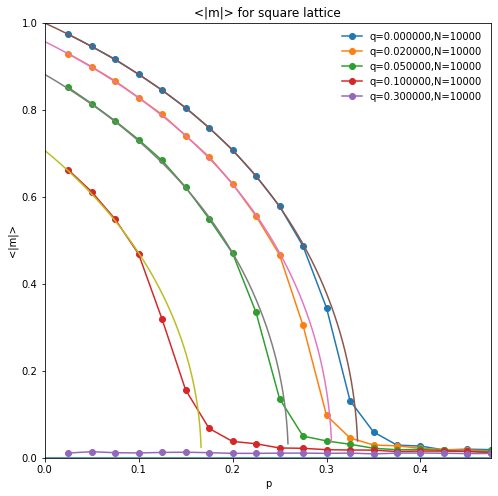

also making mean field
border_plus: (1e-09, 0.4666666666666667)
border_minus: (1e-09, 1)
border_plus: (1e-09, 0.3333333333333333)
border_minus: (1e-09, 1)
border_plus: (1e-09, 0.03614573958344632)
border_minus: (1e-09, 1)
border_plus: (1e-09, 0)
border_minus: (1e-09, 1)


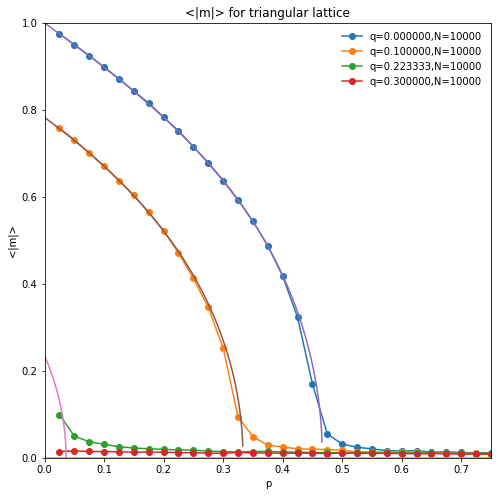

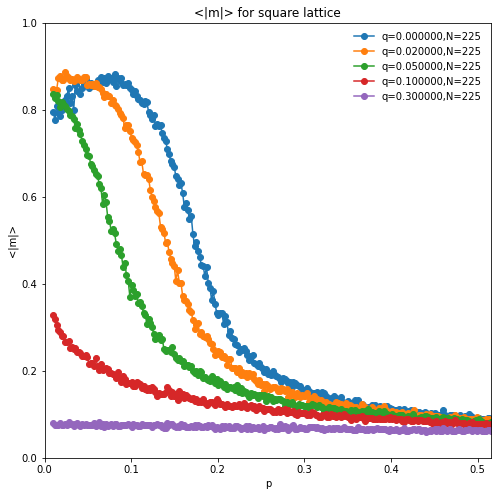

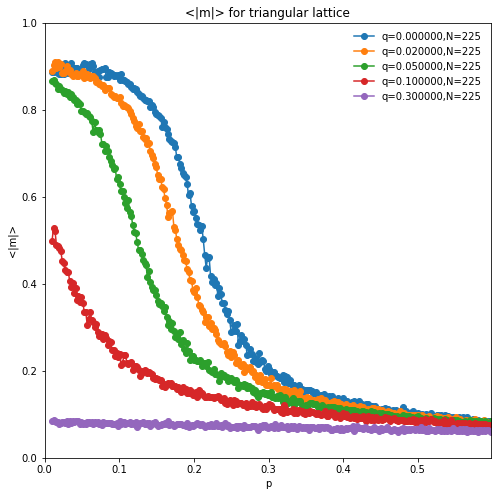

In [51]:
def plotAverages(directory,Ns,savename = "infinite_", typek = "square", plot_mean = True):
    fig, ax = plt.subplots(1,figsize = (8,8))
    labels = []
    qs = []
    xlim = 1
    for file in os.listdir(directory):
        if file[-4:]==".dat":
            f = pd.read_csv(directory+"\\"+ file, names = ["p",'m','susc','binder'],skiprows = 1, sep ="\t")
            splt = file.split(",")
            q = float(splt[1].split("=")[-1])
            N=int(splt[2].split("=")[-1])
            if q < 1e-7:
                q =0
            #print(f)
            if N in Ns:
                qs.append(q)
                labels.append(splt[1]+","+splt[2])
                ax.plot(f['p'], f['m'], marker = "o")
                xlim = np.max(f['p'])
            #if q < 0.08:
                #ax[1].plot(f['p'], f['binder'], marker = "+")
            
            #print(f)
    

    leg =labels
    if plot_mean:
        if typek == "triangular":
            #leg = labels + ["q="+str(a) for a in qs]
            print("also making mean field")
            makeTriangularMagnet_forp(1000,qs,ax)
        elif typek =="square":
            #leg = labels + ["q="+str(a) for a in qs]
            print("also making mean field")
            makeSquareMagnet(1000,qs,ax)
    ax.legend(leg,loc='best', frameon=False)   
    ax.set_title("<|m|> for " + typek + " lattice")
    ax.set_xlim(0,xlim)
    ax.set_ylim(0,1)
    ax.set_xlabel("p")
    ax.set_ylabel("<|m|>")
        
    #ax[1].legend(leg,loc='best', frameon=False)   
    #ax[1].set_title("Binder cumulant estimation for " + typek + " lattice")
    #ax[1].set_xlim(0,0.7)
    #ax[1].set_ylim(0,1)
    #ax[1].set_xlabel("p")
    #ax[1].set_ylabel("U")
    
       
    plt.savefig(savedir+savename +typek +".pdf")
    plt.show()
    
    
    
    
    
    
    
Ns = [15*15]          
plotAverages("D:\\Uni\\SEMESTERS\\MS\\BDA\\I\\ComplexSystems\\Majority-vote-model\\cpp\\Project1\\Results\\Square\\",[10000], typek= "square")            

plotAverages("D:\\Uni\\SEMESTERS\\MS\\BDA\\I\\ComplexSystems\\Majority-vote-model\\cpp\\Project1\\Results\\Triangular\\",[10000], typek = "triangular") 
plotAverages("D:\\Uni\\SEMESTERS\\MS\\BDA\\I\\ComplexSystems\\Majority-vote-model\\cpp\\Project1\\Results\\Non_infty\\Square\\",savename="non_infty_",Ns=Ns, typek = "square",plot_mean = False)            
plotAverages("D:\\Uni\\SEMESTERS\\MS\\BDA\\I\\ComplexSystems\\Majority-vote-model\\cpp\\Project1\\Results\\Non_infty\\Triangular\\",savename="non_infty_",Ns=Ns, typek = "triangular",plot_mean =False) 

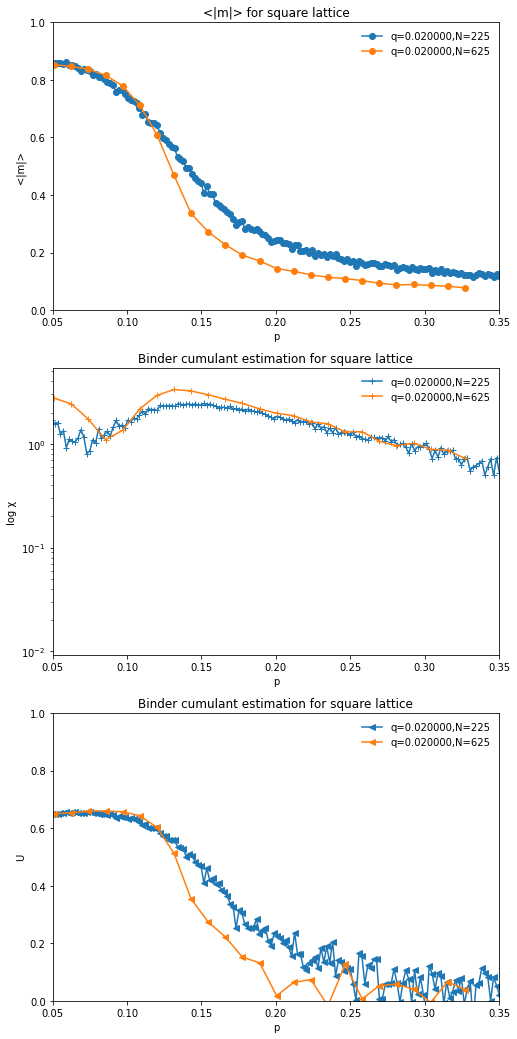

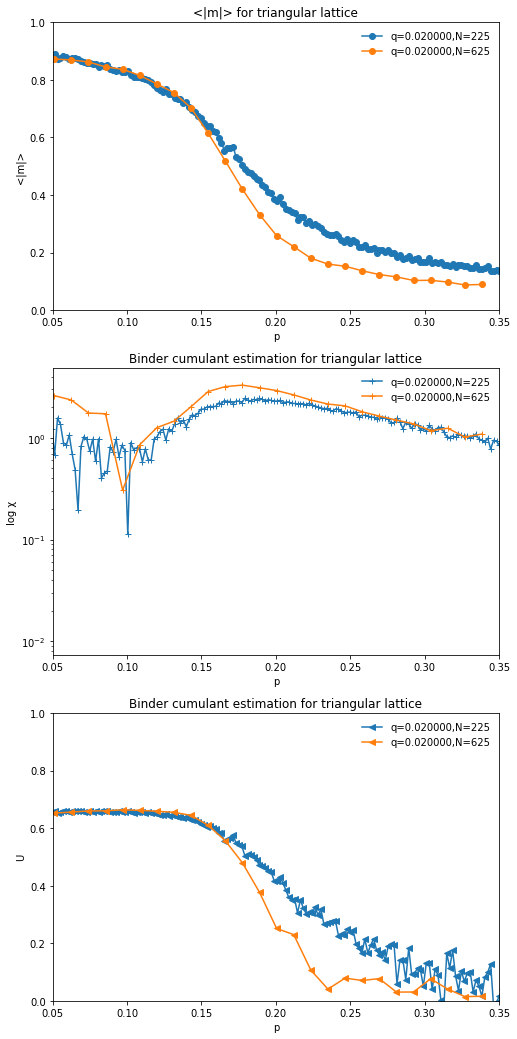

In [55]:
def plotAveragesSizes(directory,Ns,q_wanted,savename = "simulation", typek = "square", plot_mean = True):
    fig, ax = plt.subplots(3,figsize = (8,18))
    labels = []
    qs = []
    xlim = 1
    xmin = 0
    for file in os.listdir(directory):
        if file[-4:]==".dat":
            f = pd.read_csv(directory+"\\"+ file, names = ["p",'m','susc','binder'],skiprows = 1, sep ="\t")
            splt = file.split(",")
            q = float(splt[1].split("=")[-1])
            N=int(splt[2].split("=")[-1])
            if q < 1e-7:
                q =0
            #print(f)
            if N in Ns and q == q_wanted:
               # print(f['binder'])
                qs.append(q)
                labels.append(splt[1]+","+splt[2])
                ax[0].plot(f['p'], f['m'], marker = "o")
                ax[1].plot(f['p'], np.log(f['susc']), marker = "+")
                ax[2].plot(f['p'], f['binder'], marker = "<")
                xlim = np.max(f['p'])
                xmin = np.min(f['p'])
            #if q < 0.08:
                #ax[1].plot(f['p'], f['binder'], marker = "+")
            
            #print(f)
    
    xlim = 0.35
    xmin = 0.05
    leg =labels
    if plot_mean:
        if typek == "triangular":
            #leg = labels + ["q="+str(a) for a in qs]
            print("also making mean field")
            makeTriangularMagnet_forp(1000,qs,ax)
        elif typek =="square":
            #leg = labels + ["q="+str(a) for a in qs]
            print("also making mean field")
            makeSquareMagnet(1000,qs,ax)
    ax[0].legend(leg,loc='best', frameon=False)   
    ax[0].set_title("<|m|> for " + typek + " lattice")
    ax[0].set_xlim(xmin,xlim)
    ax[0].set_ylim(0,1)
    ax[0].set_xlabel("p")
    ax[0].set_ylabel("<|m|>")
        
    ax[1].legend(leg,loc='best', frameon=False)   
    ax[1].set_title("Binder cumulant estimation for " + typek + " lattice")
    ax[1].set_xlim(xmin,xlim)
    ax[1].set_xlabel("p")
    ax[1].set_ylabel("log \u03C7")
    ax[1].set_yscale("log")
    
    
    ax[2].legend(leg,loc='best', frameon=False)   
    ax[2].set_title("Binder cumulant estimation for " + typek + " lattice")
    ax[2].set_xlim(xmin,xlim)
    ax[2].set_ylim(0,1)
    ax[2].set_xlabel("p")
    ax[2].set_ylabel("U")
       
    plt.savefig(savedir+savename + typek + ".pdf")
    plt.show()
    

Ns = [5*5,15*15,25*25,50*50]
plotAveragesSizes("D:\\Uni\\SEMESTERS\\MS\\BDA\\I\\ComplexSystems\\Majority-vote-model\\cpp\\Project1\\Results\\Non_infty\\Square\\",Ns,0.02,savename= "non_infty_sizes_", typek = "square",plot_mean = False)            
plotAveragesSizes("D:\\Uni\\SEMESTERS\\MS\\BDA\\I\\ComplexSystems\\Majority-vote-model\\cpp\\Project1\\Results\\Non_infty\\Triangular\\",Ns,0.02,savename= "non_infty_sizes_", typek = "triangular",plot_mean =False)     

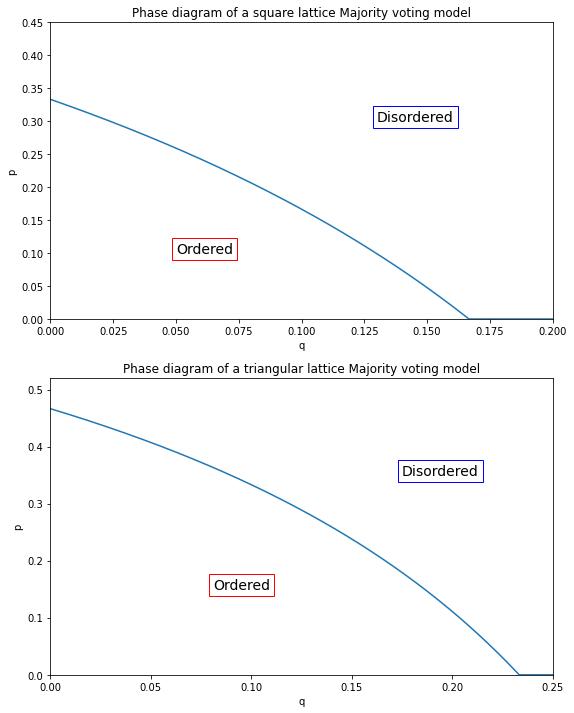

In [15]:
fig,ax = plt.subplots(2,figsize= (9,12))
qnum = 1000
qstart = 0.0
qend = 0.4
qstep = 1.0*(qend-qstart)/qnum
q= qstart
qs=[]
border_sq = []
border_tr = []
while q <= qend:
    g= 1-2*q
    qs.append(q)
    sq = (6*q-1)/(6*q-3)
    if sq<0:
        sq=0
    tr = (15*g-8)/(15*g) #(15*q-8)/(15*q)
    if tr < 0:
        tr = 0
    border_sq.append(sq)
    border_tr.append(tr)
    q+=qstep
#-------------square---------------
ax[0].plot(qs,border_sq)
ax[1].plot(qs,border_tr)
ax[0].set_xlim(0,0.2)
ax[0].set_ylim(0,0.45)
ax[0].set_xlabel("q")
ax[0].set_ylabel("p")
ax[0].set_title("Phase diagram of a square lattice Majority voting model")
ax[0].text(0.13, 0.3, "Disordered",fontsize = 14, bbox=dict(fill=False, edgecolor='blue', linewidth=1))
ax[0].text(0.05, 0.1, "Ordered",fontsize = 14, bbox=dict(fill=False, edgecolor='red', linewidth=1))

#-------------triangular---------------
ax[1].set_xlim(0,0.25)
ax[1].set_ylim(0,0.52)
ax[1].set_xlabel("q")
ax[1].set_ylabel("p")
ax[1].set_title("Phase diagram of a triangular lattice Majority voting model")
ax[1].text(0.175, 0.35, "Disordered",fontsize = 14, bbox=dict(fill=False, edgecolor='blue', linewidth=1))
ax[1].text(0.081, 0.15, "Ordered",fontsize = 14, bbox=dict(fill=False, edgecolor='red', linewidth=1))
plt.savefig(savedir + "criticality.pdf")